In [1]:
from sympy import symbols, init_printing
import sympy
from sympy.utilities.lambdify import lambdastr
import sympy.physics.mechanics as me
from pydy.system import System
import matplotlib.pyplot as plt
from scipy.integrate import ode, odeint
from scipy.optimize import fsolve
import numpy as np
%matplotlib inline
init_printing(True)

In [2]:
# Create the frames
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

# Create the symbols
# x, y, beta, e, F, L1, L2 = me.dynamicsymbols('x y beta e F L1 L2')
x, z, beta = sympy.symbols('x z theta')
H, a, b, m, g, k, t = sympy.symbols('H a b m g k t')
c, c_rod, D, M, k_rod, mom = sympy.symbols('c c_rod D M k_rod mom')
Izz, Izz_rod = sympy.symbols('Izz Izz_rod')
L1, L2 = sympy.symbols('L1 L2')

# Orient the Beta frame
B.orient(A, 'Axis', (beta, A.y))

In [3]:
# Create the first point
A1 = me.Point('A1')
A2 = me.Point('A2')

# Set the physical position
A1.set_pos(A1, 0)
A2.set_pos(A1, H * A.x)

# Set the center of Gravity
G = me.Point('G')
G.set_pos(A1, x*A.x + z*A.z)

# Movable cog
Gm = me.Point('Gm')
Gm.set_pos(A1, x*A.x + z*A.z)

# Create the attachment points
B1 = me.Point('B1')
B1.set_pos(G, -a/2 * B.x - b/2 * B.z)
B2 = me.Point('B2')
B2.set_pos(G, a/2 * B.x - b/2 * B.z)

# Create the position vectors
a2 = A2.pos_from(A1)
a2_x = a2 & A.x
a2_z = a2 & A.z

r1 = B1.pos_from(G)
r1_x = r1 & A.x
r1_z = r1 & A.z

r2 = B2.pos_from(G)
r2_x = r2 & A.x
r2_z = r2 & A.z

r21 = B2.pos_from(B1)
r21_x = r21 & A.x
r21_z = r21 & A.z

s1 = B1.pos_from(A1)
s2 = B2.pos_from(A2)

In [4]:
p = ((r21_x * x + a2_x * r1_x) * z - r21_z * x**2 +
     (r1_z * r2_x - r1_x * r2_z + a2_x * r21_z - a2_z * r2_x) * x +
     r1_x * (a2_x * r2_z - a2_z * r2_x))
equation_all = p.subs({H:2.8956, a:0.133, b:0.0665}).evalf()
equation_all = equation_all.simplify()
lambda_str1 = lambdastr((beta), equation_all)
lambda_str2 = lambda_str1.replace('sin', 'np.sin')
lambda_str3 = lambda_str2.replace('cos', 'np.cos')
lambda_str4 = lambda_str3.replace('x', 'x_temp')
lambda_str = lambda_str4.replace('z', 'z_temp')
func1 = eval(lambda_str)

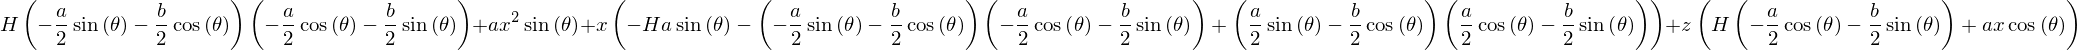

In [5]:
p

In [6]:
# # Use the numerical solver to find the roots
# x_values_geo = np.linspace(0.4,2.4956,100)
# # Linkage Geometry
# z_temp = 1.5
# func = lambda beta : (0.133*x_temp**2*np.sin(beta) + x_temp*(-(-0.0665*np.sin(beta) -
#                      0.03325*np.cos(beta))*(-0.03325*np.sin(beta) - 0.0665*
#                      np.cos(beta)) + (-0.03325*np.sin(beta) + 0.0665*np.cos(
#                      beta))*(0.0665*np.sin(beta) - 0.03325*np.cos(beta)) -
#                      0.3851148*np.sin(beta)) + z_temp*(0.133*x_temp*np.cos(beta) -
#                      0.0962787*np.sin(beta) - 0.1925574*np.cos(beta)) +
#                      2.8956*(-0.0665*np.sin(beta) - 0.03325*np.cos(beta))*(
#                      -0.03325*np.sin(beta) - 0.0665*np.cos(beta)))
# beta_values_geo = []
# for i in range(100):
#     x_temp = x_values_geo[i]
#     tau_initial_guess = 0.5
#     tau_solution = fsolve(func, tau_initial_guess)
#     beta_values_geo.append(np.rad2deg(tau_solution))

In [7]:
x_values_geo = np.linspace(0.4,2.4956,100)
z_temp = 1.5
initial_guess = 0.5
beta_values_geo = []
for i in range(100):
    x_temp = x_values_geo[i]
    beta_solution = fsolve(func1, initial_guess)
    beta_values_geo.append(np.rad2deg(beta_solution))

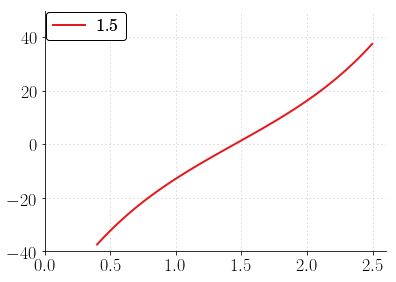

In [8]:
# plt.plot(x_values_10,beta_values_10, label=10)
plt.plot(x_values_geo,beta_values_geo, label=1.5)
plt.xlim(0,2.6)
plt.ylim(-40,50)
plt.legend(loc="upper left")
# plt.savefig('/Users/forrest/Desktop/tes.pdf')
plt.show()

In [9]:
# x_values_heat = np.linspace(0.28956,2.60604,100)
# z_values_heat = np.linspace(0.6, 2.286, 100)
x_values_heat = np.linspace(0.4,2.4956,100)
# z_values_heat = np.linspace(0.6, 2, 100)
z_values_heat = np.linspace(0.4,2.4956,100)

beta_values_heat = []
x_values_heatp = []
z_values_heatp = []
for j in range(100):
    z_temp = z_values_heat[j]
    for i in range(100):
        x_temp = x_values_heat[i]
        tau_initial_guess = 0.5
        tau_solution = fsolve(func1, tau_initial_guess)
        beta_values_heat.append(np.rad2deg(tau_solution))
        x_values_heatp.append(x_temp)
        z_values_heatp.append(z_temp)
x_values_heat_np = np.asarray(x_values_heatp)
z_values_heat_np = np.asarray(z_values_heatp)
beta_values_heat_np = np.asarray(beta_values_heat)
beta_map = beta_values_heat_np.reshape(100,100)

In [10]:
# # x_values_heat = np.linspace(0.28956,2.60604,100)
# # z_values_heat = np.linspace(0.6, 2.286, 100)
# x_values_heat = np.linspace(0.4,2.4956,100)
# # z_values_heat = np.linspace(0.6, 2, 100)
# z_values_heat = np.linspace(0.4,2.4956,100)

# beta_values_heat = []
# x_values_heatp = []
# z_values_heatp = []
# for j in range(100):
#     z_temp = z_values_heat[j]
#     func = lambda beta : (0.133*x_temp**2*np.sin(beta) + x_temp*(-(-0.0665*np.sin(beta) -
#                          0.03325*np.cos(beta))*(-0.03325*np.sin(beta) - 0.0665*
#                          np.cos(beta)) + (-0.03325*np.sin(beta) + 0.0665*np.cos(
#                          beta))*(0.0665*np.sin(beta) - 0.03325*np.cos(beta)) -
#                          0.3851148*np.sin(beta)) + z_temp*(0.133*x_temp*np.cos(beta) -
#                          0.0962787*np.sin(beta) - 0.1925574*np.cos(beta)) +
#                          2.8956*(-0.0665*np.sin(beta) - 0.03325*np.cos(beta))*(
#                          -0.03325*np.sin(beta) - 0.0665*np.cos(beta)))
#     print(j)
#     for i in range(100):
#         x_temp = x_values_heat[i]
#         tau_initial_guess = 0.5
#         tau_solution = fsolve(func, tau_initial_guess)
#         beta_values_heat.append(np.rad2deg(tau_solution))
#         x_values_heatp.append(x_temp)
#         z_values_heatp.append(z_temp)
# x_values_heat_np = np.asarray(x_values_heatp)
# z_values_heat_np = np.asarray(z_values_heatp)
# beta_values_heat_np = np.asarray(beta_values_heat)
# beta_map = beta_values_heat_np.reshape(100,100)

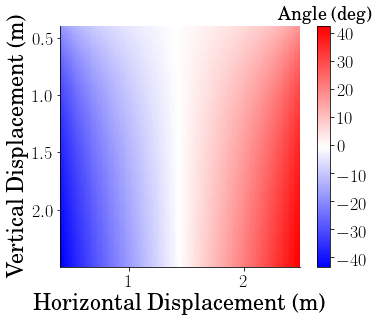

In [13]:
# title = 'Angle Over Workspace'
fig, ax = plt.subplots()
x = x_values_heat
y = z_values_heat
X,Y = np.meshgrid(x,y)

plt.pcolormesh(X,Y,beta_map, cmap=plt.cm.bwr)
ax.invert_yaxis()
ax.axis('image')
ax.set_aspect('equal')
cbar = plt.colorbar()
cbar.ax.set_title('Angle (deg)',size=18)
plt.xlabel('Horizontal Displacement (m)')
plt.ylabel('Vertical Displacement (m)')
# plt.title(title)
plt.savefig('/Users/forrest/Desktop/angles.pdf')
plt.show()